<a href="https://colab.research.google.com/github/ninetales2002/Portfolio/blob/main/Risk%20Data%20Analysis%20Projects/TP%20%C3%81lgebra%20Lineal%20Computacional%3A%20Sistema%20de%20recomendaci%C3%B3n%20de%20vinos%20utilizando%20PCA%20y%20KNN/TP_2_(versi%C3%B3n_final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last<div class="pull-right"><img src="logoDC.jpeg" width="500" height="500" /></div/>

# Trabajo Practico 2

***
<div class="pull-left">29 de octubre de 2023 </div><div class="pull-right">Algebra lineal computacional</div>

<div class="pull-right">Docentes: Constanza Sanchez Vega, Pablo Negri, Ignacio Gonzalez Tafler  </div>
<div class="pull-right">JPT: Silvina Dengra  </div>
<div class="pull-right">Ayudante de 1ra: Juan Winograd  </div>
<div class="pull-right">Ayudantes de 2ra: Dario Turco, Gonzalo Carabajal, Guido Freire  </div>

| Integrante | LU | Correo electrónico |
| -- | -- | -- |
| Micaela Pego | 380/22 | micaelapego@gmail.com |
| Antony Suarez | 792/21 | sebastsuar@gmail.com |

# Tabla de contenidos

* [Introducción](#Introducción)
* [Ejercicios](#Ejercicios)

# Introducción

El objetivo principal de este trabajo práctico es reducir la complejidad de un conjunto de datos y construir un sistema de recomendación de vinos para los clientes de una tienda de vinos.  
Para ello emplearemos la técnica de análisis de componentes principales (PCA) con el objetivo reducir de la dimensionalidad, la cual nos permite transformar nuestro conjunto inicial de datos (matriz M) de alta dimension a un espacio de menor dimension, conservando la mayor parte de la informacion. Esto lo logramos identificando las direcciones que capturan la mayor variacion de datos y proyectando los datos en tales direcciones, que se denominan componentes principales.



### Importamos librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import heapq
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

## Ejercicio 1.
Seguir los siguientes pasos para implementar un sistema de recomendación de vinos:

(a) Descargar los datos.

(b) Separar los datos en variables independientes (X) y dependiente (Y).

(c) Normalizar y centrar los datos. Como puede verse el conjunto de datos no está normalizado y puede estar desplazado del origen. Se pide construir una función en python que normalice y centre los valores respecto del promedio. Es decir, aplicar a cada variable dependiente:

xi = (Xi − X)/s,
X = (PN i=1 Xi)/N
s =

¿Por qué es importante este paso?

(d) Calcular la matriz de covarianza. ¿Qué representa la matriz de covarianza? ¿Qué dimensiones tiene y qué propiedades cumple?

(e) Encontrar el máximo de los autovalores, y su correspondiente autovector, de la matriz de
covarianza hallada en el item anterior por el método de la potencia. Implementar una función que dada una matriz encuente el máximo autovalor y su correspondiente autovector.

(f) Modificar la función anterior para encontrar (además del máximo) los siguientes n autovalores sucesivos y sus respectivos autovectores. Además de la matriz, n debe ser parámetro de entrada
de la función.

¿Cómo se relaciona la cantidad de autovalores con la cantidad de propiedades de los vinos?

¿Qué representan cada unos de los autovectores correspondientes?


(g) Finalmente, dado un conjunto de características de un vino en particular, obtener su clasificación, es decir, a qué segmento de cliente pertenece. Para ello, se utiliza el método de PCA a
partir de los componentes hallados en los items anteriores. La función debe tomar como dato
de entrada el o los vinos a clasificar y el/los autovectores principales hallados con anterioridad.

En primera aproximación utilizaremos el conocido algoritmo de k vecinos más cercanos o kNN
[1], por su sigla en inglés, para asignar la clasificación. En su versión más simple, este algoritmo
considera a cada objeto de la base de entrenamiento como un punto en el espacio euclídeo mdimensional (que se corresponde con la cantidad de características de cada vino), para el cual
se conoce a qué clase corresponde (en nuestro caso, "Segmento Cliente") para luego, dado un nuevo objeto, asociarle la clase del o los puntos más cercanos de la base de datos.




# Respuestas

c)
Antes de definir la función principal que llevará a cabo la tarea de centralizar la matriz, definimos dos funciones secundarias para calcular la media y el desvío por columna.

Una vez hecho esto definimos la función principal centralizar(), que toma una matriz y obtiene los vectores con la media y el desvío llamando a las funciones anteriores. Luego resta a cada fila de la misma la media y divide por el desvío, obtieniendo así la matriz centralizada.

Además definimos otra función, centralizar_test(), con el objetivo de posteriormente utilizarla para centralizar los datos de test con la media y desvío de los datos de entrenamiento.

La primera componente principal en PCA se elige para capturar la mayor cantidad de varianza en los datos. Por este motivo, centralizar es un paso muy importante, pues al restar la media a los datos se obtiene un conjunto de datos de promedio igual a 0, de manera que se elimina el sesgo en la media.
Si no se centralizan los datos, la primera componente principal se vería influenciada fuertemente por la media y no tanto por la variabilidad intrínseca de los datos.

Por otro lado, los datos deben ser divididos en cada columna por su desviación estándar con el objetivo de estandarizar o normalizar las escalas de las variables. Si las variables tienen unidades o escalas diferentes, el análisis de PCA podría verse afectado por aquellas variables que tienen magnitudes más grandes. Al dividir por la desviación estándar, todas las variables quedan en la misma escala, lo que garantiza que cada variable tenga un peso comparable en el análisis. Esto además facilita la interpretación de las cargas de las variables en las componentes principales, es decir, cómo contribuyen las variables a cada componente principal.


d)

La matriz de covarianza es una matriz que contiene la covarianza entre pares de variables.

 Su dimensión depende de la cantidad de variables presentes y tendrá igual cantidad de filas que de columnas, es decir, es cuadrada. En este caso, como tenemos 13 variables, la matriz de covarianza es de 13x13.
Esta matriz cuenta con las siguientes propiedades:
1. Es simétrica, la covarianza entre dos variables en la posición i j es la misma que para esas mismas variables en la posición j i.
1.  Cuando i=j se obtiene que la covarianza entre una variable y ella misma es la varianza. Es este caso, como además estamos dividiendo por el desvío en cada columna, se obtiene el desvío al cuadrado en el denominador el cual se cancela dando como resultado 1 en la diagonal.
2. A partir de esta matriz se pueden calcular los componentes principales. Los autovectores de esta matriz corresponden a los autovectores de la matriz inicial.

f)

La cantidad de autovalores coincide con la dimensión de la matriz de covarianza, la cual a su vez es igual a la cantidad de variables. Cada autovalor de la matriz de covarianza representa la cantidad de varianza atribuída cada una de las componentes principales, las cuales corresponden a diferentes direcciones en el espacio de las variables.

Por otra parte, los autovectores especifican la relación lineal entre las variables originales y las componentes principales. Los elementos del i-ésimo autovector corresponden a los coeficientes que indican cómo se ponderan las variables originales en la i-ésima componente principal.
De esta manera, los autovectores obtenidos mediante la matriz de covarianza representan las direcciones de las componentes principales a lo largo de las cuales los datos tienen la máxima variabilidad.

In [ ]:
# A continuación definimos las funciones que se emplearán para la realización de este trabajo:

# c)
# 1. media(): toma una matriz y devuelve un vector con la media de cada columna de la matriz.
def media(matriz):
  n, c= matriz.shape
  sumas= [0]*c
  for i in range(n):
    for j in range(c):
      sumas[j]+= matriz[i][j]
  media_array = [element/ n for element in sumas]
  return media_array


# 2. desvio(): toma una matriz y devuelve un vector con el desvío de cada columna de la matriz.
def desvio(matriz):
  n, c= matriz.shape
  m= media(matriz)
  sumasCuad= [0]*c
  for i in range(n):
    for j in range(c):
      sumasCuad[j]+=(matriz[i][j]-m[j])**2
  desvio_array = [np.sqrt(element/ n) for element in sumasCuad]
  #desvio_array= [np.sqrt(suma) for suma in desvio_array]
  return desvio_array

# 3. distancia(): calcula la distancia euclídea entre dos vectores.
def distancia(x1, x2):
  sumaComponentes= 0
  for i in range(len(x1)):
    sumaComponentes+= (x1[i]-x2[i])**2
  return np.sqrt(sumaComponentes)


# FUNCIONES PRINCIPALES

# centralizar(): toma una matriz, resta a cada observación la media y divide por el desvío correspondiente
# a cada columna por separado. Se obtiene así la matriz centralizada.

def centralizar(data_array):
    n, c = data_array.shape  # n= cantidad categorias

    m= media(data_array)
    s= desvio(data_array)

    X= np.copy(data_array)

    for i in range(n):
        X[i] = X[i]- m

    for i in range(n):
        X[i] = X[i]/s

    print(type(X))

    return X, m , s

# centralizar_test(): similar a la anterior pero en lugar de calcular la media y el desvío de la matriz, se obtiene
# estos por pasaje de parámetros. Se la define de este modo con el objetivo de poder centralizar los datos de test
# correctamente con la media y desvío de los datos de entrenamiento.

def centralizar_test(data_array, m, s):
    n, c = data_array.shape  # n= cantidad categorias

    X= np.copy(data_array)

    for i in range(n):
        X[i] = X[i]- m

    for i in range(n):
        X[i] = X[i]/s

    return X

# e)

# e)
# potencia(): Retorna el atovalor de mas alto valor con su respectivo autovector
# Parámetros:
#        1. matriz: matriz centralizada.
#        2. v0: vector inicial para la iteración.
#        3. epsilon: error minimo entre el vector el vector solución y el aproximado.

def potencia(matriz, v0=[], epsilon=1e-8, verbose=False):
    if matriz.shape[0] != len(v0):
        print("dim(v0) != dim(A)")
        return 0
    if len(v0) == 0: v0 = 2 * np.random.rand(matriz.shape[0],1) - 1
    r_k =v0.transpose()@matriz@v0/(v0.transpose()@v0) # cociente de raleigh
    v_k = matriz@v0/np.linalg.norm(matriz@v0,2)
    delta = np.abs(v_k.transpose()@matriz@v_k/(v_k.transpose()@v_k) - r_k)

    while delta >= epsilon:
        v_k = matriz@v_k
        v_k/=np.linalg.norm(v_k,2)
        r_temp = v_k.transpose()@matriz@v_k/(v_k.transpose()@v_k)
        delta = np.abs(r_temp-r_k) # otra forma|| v_(k+1) - v_k ||_2
        r_k = r_temp
    r_k = r_k[0][0]
    #v_k = v_k.transpose()[0]
    if verbose :
        print("autovalor : ", r_k)
        print("autovector : \n", v_k)
    return r_k, v_k

# f)

def potenciaTrasladada(matriz, v0=[], cant_componentes=87 , precision=1e-6, verbose=False):
    n = matriz.dtype
    if matriz.dtype != 'float64' : n = np.float64
    matriz_c = matriz.astype(n)
    n = matriz.shape[0]
    if cant_componentes > n: cant_componentes = n
    if len(v0) == 0: v0 = 2 * np.random.rand(n,1) - 1
    d_aval =[]
    v_avec = []
    while cant_componentes > 0:
        a_val, a_vec = potencia(matriz_c, v0, epsilon=precision, verbose=False)
        #print("autovalor : ", a_val)
        matriz_c-= a_val*a_vec@a_vec.transpose()
        d_aval.append(a_val)
        v_avec.append(a_vec.transpose()[0])
        cant_componentes-=1
    v_avec = np.column_stack(v_avec)

    return d_aval, v_avec


# g)

# clas_KNN(): toma un vector de variables a partir de las cuales se quiere predecir
# una variable categórica distinta (en este caso, el tipo de vino).
# Parámetros:
#        1. x_test_i: vector de variables a predecir.
#        2. x_train_proy: matriz que contiene el conjunto de datos de entrenamiento proyectado
#        3. y_train: conjunto de clasificaciones correspondientes a los datos de entrenamiento
#        4. Ave: autovectores asociados a la matriz de covarianza de los datos de entrenamiento.
#        5. m: vector con la media de los datos de entrenamiento por columna.
#        6. s: vector con el desvío de los datos de entrenamiento por columna.
#        7. n_comp: cantidad de componentes principales que se quieren utilizar para realizar la
#        predicción
#        8. k: cantidad de 'vecinos' más cercanos que se quieren considerar.

def clas_KNN(x_test_i, x_train_proy, y_train, AVe, m, s, n_comp, k):

    # Centro los datos del test con la media y desvío de los datos de entrenamiento:
    x_test_cen_i = x_test_i - m
    x_test_cen_i= x_test_cen_i / s

    # Proyecto los datos según la cantidad de componentes que tomo:
    #x_train_proy= x_train_cen @ AVe[:,0:n_comp] # CK
    x_test_proy_i= x_test_cen_i @ AVe[:,0:n_comp]

    tuplas_norma_iD = []

    # Calculo las distancias euclídeas de x_train_proy respecto a x_test_proy
    for i in range(len(x_train_proy)):
      normaI= distancia(x_train_proy[i], x_test_proy_i)
      tuplai= (i, normaI)
      tuplas_norma_iD.append(tuplai)

    # Ordeno la lista de tuplas de manera creciente según la norma
    tuplas_ordenadas = sorted(tuplas_norma_iD, key=lambda x: x[1])

    clasificacionesDeLosK = []
    for i in range(k):
        id = tuplas_ordenadas[i][0]
        clasificacionesDeLosK.append(y_train[id])

    cantidades= {}
    cantidades[1]= clasificacionesDeLosK.count(1)
    cantidades[2]= clasificacionesDeLosK.count(2)
    cantidades[3]= clasificacionesDeLosK.count(3)

    max_key = max(cantidades, key=cantidades.get)

    return (max_key)


In [ ]:

#########################
#****visualización*****#
########################

# A continuación se definen las funciones que se emplearán para el ejercicio n° 2 del trabajo práctico.

# Creamos tabla de varianzas según modelos
def crearTabla (D, labels=['Modelo','Componente','Varianza explicada','Porcentaje','Acumulado'], index = 2, modelos=0):
    modelos+=1
    if modelos > len(D) : modelos= len(D)+1
    data =[]
    for modelo in range(1,modelos):
        varianza=0
        acumulada=0
        for comp in range(modelo):
            varianza=D[comp]/sum(D)
            acumulada+=varianza
            data.append([modelo,comp+1,varianza,varianza*100,acumulada])
    # definimos df y seteamos indices
    df = pd.DataFrame(data=data, columns=labels)
    df = df.set_index(labels[:index])
    print(df)
    return df

def matriz_confusión(predicciones, reales):
  matriz= [[0,0,0],[0,0,0],[0,0,0]]
  for i in range(3):  ## Para cada fila
    for j in range(3):  ## Por cada columna
        Aij=0
        for k in range(len(predicciones)):
          Aij += 1 if (predicciones[k] == (j+1) and y_test[k]==(i+1))  else 0
        matriz[i][j]= Aij

  matriz_confusion= pd.DataFrame(matriz, columns=['Predicción 1', 'Predicción 2', 'Predicción 3'], index=['Real 1', 'Real 2', 'Real 3'])
  print(matriz_confusion)

def plotVector(dict_v, rotulos, start=0):
    n = np.arange(start,len(dict_v['vector']))
    plt.plot(n,dict_v['vector'][start:], label=dict_v['leyenda'])
    plt.xlabel(rotulos['eje x'])
    plt.ylabel(rotulos['eje y'])
    plt.title(rotulos['titulo'])
    plt.legend()
    plt.show()
    plt.close()

def scatter1D_cat(x_train_cen, x_test, y_train, y_pred, AVe, m_train, s_train):

  # Centralizo datos de testeo
  x_test_cen = centralizar_test(x_test, m_train, s_train)

  # Proyecto x_train y x_test según número de componentes
  x_train_proy= x_train_cen @ AVe[:,0:1]
  x_test_proy= x_test_cen @ AVe[:,0:1]

  # Creo el gráfico
  colors = {1: 'lightsalmon', 2: 'red', 3: 'darkred'}
  plt.figure(figsize=(20, 5))
  plt.scatter(x_train_proy, np.zeros_like(x_train_proy), c=[colors[categ] for categ in y_train], label= "1: Rosado, 2: Amarillo, 3: Rojo oscuro")
  plt.legend()
  plt.title('Gráfico con n° componentes = 1', loc='right', pad=20)


  # Añado puntos de los test con el color según la predicción
  plt.scatter(x_test_proy, np.zeros_like(x_test_proy), c=[colors[categ] for categ in y_pred], marker='x', s=100)

  plt.yticks([])
  plt.xlim(-5, 5)
  plt.show()


def scatter2D_cat(x_train_cen, x_test, y_train, y_pred, AVe, labels, m_train, s_train):

    # Centralizo datos de test:
    x_test_cen = centralizar_test(x_test, m_train, s_train)


    # Proyecto x_train y x_test según número de componentes
    x_train_proy= x_train_cen @ AVe[:,0:2]
    x_test_proy= x_test_cen @ AVe[:,0:2]

    # Obtengo ejes x e y
    u_train= x_train_proy[:,0]
    v_train= x_train_proy[:,1]

    u_test= x_test_proy[:,0]
    v_test= x_test_proy[:,1]

    colors = {1: 'lightsalmon', 2: 'red', 3: 'darkred'}

    sns.scatterplot(x = u_train , y = v_train , c = [colors[categ] for categ in y_train]).set(title=labels['titulo'])
    sns.scatterplot(x = u_test , y = v_test , c = [colors[categ] for categ in y_pred], marker='x')
    plt.xlabel(labels['u'])
    plt.ylabel(labels['v'])
    #plt.xlim(-5, 5)
    #plt.ylim(-4, 4)
    plt.show()
    plt.close()

def scatter3D_cat(data_train,data_test, cat, cat_t, AVe, m_train, s_train, labels, fig_size=6, interactive=True):
    # Set data
    x = data_train@AVe[:,:3]
    x_t = centralizar_test(data_array=data_test, m=m_train, s=s_train)
    x_t = x_t@AVe[:,:3]
    u = x[:,0].T
    v = x[:,1].T
    w = x[:,2].T
    u_t = x_t[:,0].T
    v_t = x_t[:,1].T
    w_t = x_t[:,2].T

    # set colors
    colors = {1: 'lightsalmon', 2: 'red', 3: 'darkred'}
    colors_new = [colors[categ] for categ in cat_t]
    if interactive :
        # Create traces
        trace1 = go.Scatter3d(x=u, y=v, z=w, mode='markers', name='Train', marker=dict(size=6, color=[colors[categ] for categ in cat], colorscale='Viridis'))
        trace2 = go.Scatter3d(x=u_t, y=v_t, z=w_t, mode='markers', name='Test', marker=dict(size=6, color=colors_new, symbol='cross'))

        # Create 3D interactive fig
        fig = go.Figure(data=[trace1, trace2])

        # Set design
        fig.update_layout(title=labels['titulo'], scene=dict(xaxis_title=labels['u'], yaxis_title=labels['v'], zaxis_title=labels['w']))

        # Show
        fig.show()
    else:
        # axes instance
        fig = plt.figure(figsize=(fig_size,fig_size))
        ax = Axes3D(fig, auto_add_to_figure=False)
        fig.add_axes(ax)

        # get colormap from seaborn
        cmap = sns.color_palette("viridis", as_cmap=True)

        # plot
        trace1 = ax.scatter(u, v, w, s=40, c=cat, marker='o', cmap=cmap, alpha=1)
        trace2 = ax.scatter(u_t, v_t, w_t, c=colors_new, marker='X', s=50)
        ax.set_title(labels['titulo'])
        ax.set_xlabel(labels['u'])
        ax.set_ylabel(labels['v'])
        ax.set_zlabel(labels['w'])

        plt.show()
        #plt.legend(*trace1.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
        plt.close()



# Mide la tasa de aciertos y me re categoriza el vector de predicciones para poder graficar
def tasa_aciertos(predicciones, reales, n_modelo, cat_de_acierto):
    n_tests= len(predicciones)
    exitos=0
    for i in range(n_tests):
        #exitos += 1 if predicciones[i] == reales[i] else 0
        if predicciones[i] == reales[i]:
            exitos+=1
            predicciones[i]= cat_de_acierto
        else:
            predicciones[i] = 0

    print(" \nProporción de aciertos (Modelo {}):". format(n_modelo))
    print(exitos/n_tests)
    return exitos

# Evalua un modelo en particular y mide su taza de aciertos con una función aciertos
def performance(dict_f, x, x_test, y_train, y_test, aVec, med ,s, modelos=0):
    modelos+=1
    if modelos > aVec.shape[1] : modelos= aVec.shape[1]+1
    metricas ={}
    res = []
    n = x_test.shape[0]
    for j in range(1,modelos): # rp
        Tr = x@aVec[:,:j]
        y_pred = np.zeros(n) # obtenemos el vector de predicciones por modelo
        for i in range (n):
            y_p = dict_f['f'](x_test_i=x_test[i], x_train_proy=Tr, y_train=y_train, AVe=aVec, m=med, s=s, n_comp=j, k=dict_f['param_f'])
            y_pred[i] = y_p
        exitos = dict_f['aciertos'](y_pred, y_test, j, dict_f['cat_acierto']) # exitos <= n
        metricas[j] = (exitos, y_pred)
        res.append(exitos)

    return metricas

#Ejercicio 2.

Experimentos y Graficación. Para estudiar la potencialidad del método de PCA, debemos poder
comparar valores reales con los predichos con el modelo propuesto. Para ello usualmente se dividen los datos con los que se cuenta en dos subconjuntos. El primero que llamamos datos de 'entrenamiento', usados para ajustar nuestro modelo, y el segundo con datos de 'testeo', datos que usaremos para testear. Hay distintos criterios para seleccionar estos conjuntos pero algo fundamental a tener en cuenta es la cantidad de muestras que tendría cada conjunto a partir del original, una sugerencia es usar 80% para el conjunto de entrenamiento y el 20% restante para testear.

(a) Para evaluar el sistema de recomendación del ejercicio anterior, dividir el conjunto de datos en dos, para entrenamiento y para testeo. Ejecutar el modelo realizado para el conjunto de
entrenamiento utilizando de 1 a 4 componentes principales. Es decir que se obtendrían para predecir 4 modelos, cada uno de los cuales correspondería a tomar de 1 a 4 componentes principales. Construir una tabla donde se muestre el número de componentes principales de cada modelo y los valores de la varianza explicada[2], la varianza explicada relativa y la acumulada de cada componente, es decir:

<img src= "/content/cuadro.PNG" />

(b) Realizar graficos que puedan mostrar los resultados obtenidos para los casos de los modelos con 1, 2 y 3 componentes principales. De acuerdo a los valores encontrados en la tabla del item anterior, cuál de los modelos sugiere utilizar para predecir el segmento al que pertenece un vino. Tener en cuenta que el comercio cuenta con una gran base de datos de clientes y se quiere poder hacer una recomendación
rápidamente.


(c) Realizar la matriz de confusión con los experimentos realizados en el ítem (a). ¿A qué conclusiones se puede llegar?


A continuación, seguimos los pasos propuestos para implementar el sistema de recomendación de vinos:

In [ ]:
#a) Obtener los datos
caracteristicas= ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavonoids", "Nonflavonoid phenols", "Proanthocyanics", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
vinos = pd.read_csv('wine.data', names= caracteristicas)

#b) Separar en X e Y
Y = vinos["Class"]
vinos_X = vinos[["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavonoids", "Nonflavonoid phenols", "Proanthocyanics", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]]

# (Pasamos a arrays)
vinos_array = vinos_X.values

# Dividimos los datos en set de entrenamiento y de testeo

X_train, X_test, y_train, y_test = train_test_split(vinos_X, Y, test_size=0.2)

X_train = X_train.values
X_test = X_test.values

y_train = y_train.values
y_test = y_test.values

#c) Centralizar datos

# Centralizo los datos de entrenamiento
X_train_cen, m_train, s_train = centralizar(X_train)

n, c = X_train_cen.shape

# Armar matriz de covarianza de los datos de entrenamiento
X_train_cov= (X_train_cen.T @ X_train_cen)/n

# Hallar autovectores de la matriz de covarianza, ordenados de mayor a menor según el autovalor asociado.
AVa, V = potenciaTrasladada(X_train_cov)    ### VER COMO USAR calcularCPA

# Con los datos ya listos, ejecutamos el modelo para cantidad de componentes 1 a 4:

# Proyectamos los datos de entrenamiento según el número de componentes principales a utilizar:

X_train_proy1 = X_train_cen @ V[:,0:1]

predicciones_1= []
for test in X_test:
  predicciones_1.append(clas_KNN(test, X_train_proy1, y_train, V, m_train, s_train, 1, 7))

X_train_proy2 = X_train_cen @ V[:,0:2]

predicciones_2= []
for test in X_test:
  predicciones_2.append(clas_KNN(test, X_train_proy2, y_train, V, m_train, s_train, 2, 7))

X_train_proy3 = X_train_cen @ V[:,0:3]

predicciones_3= []
for test in X_test:
  predicciones_3.append(clas_KNN(test, X_train_proy3, y_train, V, m_train, s_train, 3, 7))

X_train_proy4 = X_train_cen @ V[:,0:4]

predicciones_4= []
for test in X_test:
  predicciones_4.append(clas_KNN(test, X_train_proy4, y_train, V, m_train, s_train, 4, 7))




<class 'numpy.ndarray'>


Ejecutando la siguiente celda se obtiene la tabla con los datos de varianza de cada modelo:

In [ ]:
tabla = crearTabla(AVa, modelos = 4)

                   Varianza explicada  Porcentaje  Acumulado
Modelo Componente                                           
1      1                     0.372659   37.265889   0.372659
2      1                     0.372659   37.265889   0.372659
       2                     0.191203   19.120255   0.563861
3      1                     0.372659   37.265889   0.372659
       2                     0.191203   19.120255   0.563861
       3                     0.111980   11.198017   0.675842
4      1                     0.372659   37.265889   0.372659
       2                     0.191203   19.120255   0.563861
       3                     0.111980   11.198017   0.675842
       4                     0.067967    6.796711   0.743809


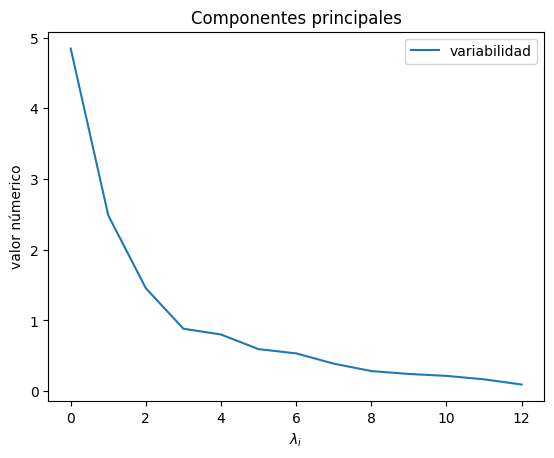

In [ ]:
autovalores = {'vector' : AVa,
                'leyenda' : 'variabilidad'}
rotulos = {'titulo' : 'Componentes principales',
           'eje x' : '$\lambda_i$',
           'eje y' : 'valor númerico'}
plotVector(dict_v=autovalores, rotulos=rotulos)

## Gráficos
vamos a graficar los puntos proyectados sobre el subespacio generado por $W_{PCA}$, todos los graficos comparten las siguientes caracteristicas:  
* los puntos de entrenamiento $(X_{train},Y_{train})$ están representados por puntos circulares $(\color{blue}{\bullet})$, divididos por sus respectivas categorías de vinos
* los puntos de test $(X_{test},Y_{test})$están representados por cruces $(\times)$

Los colores de cada símbolo corresponden a su clasificación real o predicha según sea punto o cruz.

### Modelo 1

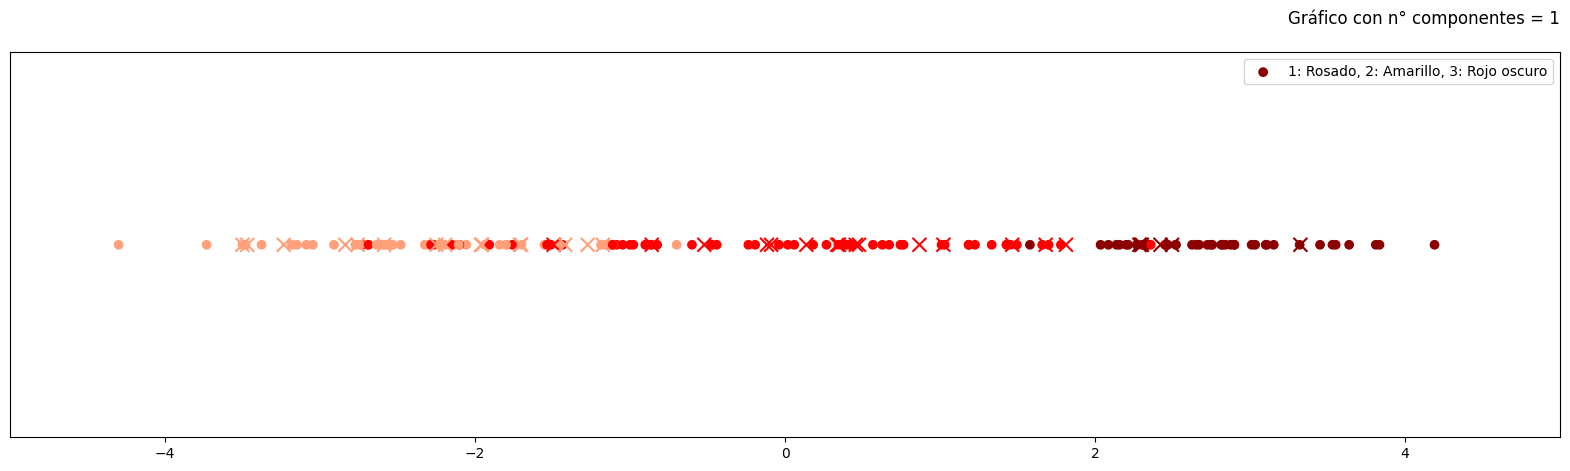

In [ ]:
scatter1D_cat(X_train_cen, X_test, y_train, predicciones_1, V, m_train, s_train)

### Modelo 2

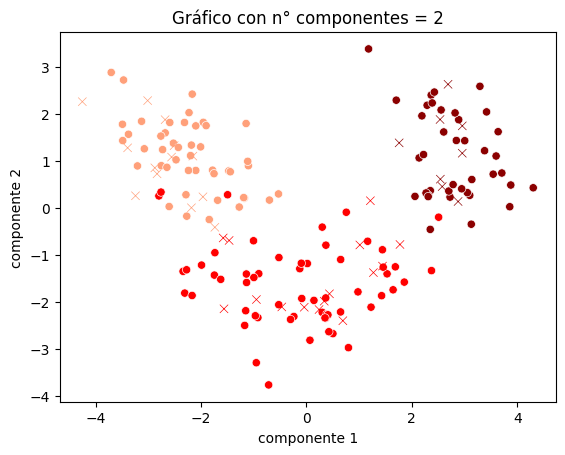

In [ ]:
rotulos = {'u' : 'componente 1', 'v' : 'componente 2', 'titulo': 'Gráfico con n° componentes = 2'}
scatter2D_cat(X_train_cen, X_test, y_train, predicciones_2, V, labels=rotulos, m_train=m_train, s_train=s_train)

### Modelo 3

In [ ]:
# ajustamos movimiento del grafico 3D, para mejor comprension de los datos, movemos con el cursor, podemos hacer zoom
mov = False
rotulos = {'u' : 'componente 1', 'v' : 'componente 2', 'w' : 'componente 3', 'titulo':'Gráfico con n° componentes = 3'}
scatter3D_cat(X_train_cen, X_test , y_train, predicciones_3 , V, m_train, s_train, labels=rotulos)

## Performance

Con la función *performance* obtenemos para cada modelo la métrica de aciertos y un vector de acierto-error, el cual nos ayudará a distinguir los aciertos y errores a la hora de predecir.

### Proporción de aciertos
En la siguiente tabla podemos observar la proporción de aciertos y la matriz de consfusión asociada a cada modelo:

In [ ]:
funciones={'f':clas_KNN, 'aciertos':tasa_aciertos, 'param_f':2, 'cat_acierto':4 }
test = performance(dict_f=funciones, x=X_train_cen, x_test=X_test, y_train=y_train, y_test=y_test, aVec=V, med=m_train, s=s_train, modelos=4)

 
Proporción de aciertos (Modelo 1):
0.8055555555555556
 
Proporción de aciertos (Modelo 2):
0.9444444444444444
 
Proporción de aciertos (Modelo 3):
0.9444444444444444
 
Proporción de aciertos (Modelo 4):
0.9722222222222222


In [ ]:
# C
print("\nModelo 1\n")
matriz_confusión(predicciones_1, y_test)
print("\nModelo 2\n")
matriz_confusión(predicciones_2, y_test)
print("\nModelo 3\n")
matriz_confusión(predicciones_3, y_test)
print("\nModelo 4\n")
matriz_confusión(predicciones_4, y_test)


Modelo 1

        Predicción 1  Predicción 2  Predicción 3
Real 1            13             1             0
Real 2             1            12             0
Real 3             0             2             7

Modelo 2

        Predicción 1  Predicción 2  Predicción 3
Real 1            13             1             0
Real 2             0            13             0
Real 3             0             1             8

Modelo 3

        Predicción 1  Predicción 2  Predicción 3
Real 1            14             0             0
Real 2             1            11             1
Real 3             0             0             9

Modelo 4

        Predicción 1  Predicción 2  Predicción 3
Real 1            14             0             0
Real 2             0            12             1
Real 3             0             0             9


De las matrices de confusión se concluye que los modelos desarrollados predicen las categorías de los vinos con buena precisión ya que casi todos los resultados de los vinos de la muestra de testeo se encuentran en la diagonal, es decir, dentro de los casos donde el valor predicho coincide con el real.

Podemos notar que el primer modelo tiene más cantidad de predicciones por fuera de la diagonal, lo que indica que es el de menor precisión. Esto tiene sentido ya que este modelo solo usa 1 componente. Pierde mucha información, por lo que su taza de aciertos es la mas baja en comparación a los otros modelos que utilizan más componentes principales.

### Conclusiones finales

 A modo de cierre, podemos decir que mediante la realización de este trabajo práctico hemos adquirido importantes conocimientos sobre el Análisis de Componentes Principales (PCA, por sus siglas en inglés). Esta técnica nos permitió reducir la dimensionalidad de los datos de 13 variables a 1, 2, 3 o 4, preservando al mismo tiempo la mayor cantidad posible de la variabilidad original, lo cual nos brindó una mayor practicidad a la hora de manipular los datos.

 Observamos que, al principio, agregar más componentes principales aumenta la precisión del modelo. Esto se explica ya que aumenta la capacidad del mismo para capturar más variabilidad en los datos. Sin embargo, alcanza un punto en el que añadir componentes adicionales no proporciona una mejora significativa en la capacidad predictiva del modelo. Esto ocurre porque a partir de la componente 3, la varianza atribuída es bastante menor.

   También pudimos observar como PCA puede ayudar a visualizar datos de alta dimensionalidad en un espacio bidimensional o tridimensional. Al reducir la dimensionalidad, es posible crear visualizaciones que permiten una comprensión más fácil de los datos.

   Este trabajo nos ha sido de gran utilidad para profundizar y expandir nuestro conocimiento sobre el PCA tanto en la parte teórica como en la práctica, mediante la implementación de la técnica a un conjunto de datos reales junto al desarrollo de un modelo de predicción KNN (K nearest neighbors) para llevar a cabo un sistema de recomendación de vinos.


